In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Project 1 

## 1 One dimensional problem

### 1.1 

We are asked to create a function called "computeIntegral1D" which takes in the following arguments:
* $x_{i-1}, x_i$: the two values defining the integration interval,
* $g$: a function you want to integrate over the interval,
* $s$: type of Gaussian quadrature rule used to approximate the integral, $s = 0$ for Gaussian-Legendre and $s = 1$ for Gaussian-Lobatto

We want to use this function to compute the following approximations:
* Gaussian-Legendre quadrature
$$
I \approx \frac{h_i}{2} \lbrack g(-\frac{h_i}{2\sqrt{3}}+\frac{x_{i-1}+x_i}{2}) + g(\frac{h_i}{2\sqrt{3}}+\frac{x_{i-1}+x_i}{2}) \rbrack
$$

* Gaussian-Lobatto quadrature

$$
I \approx \frac{h_i}{2} \lbrack \frac{1}{3} g(-\frac{h_i}{2}+\frac{x_{i-1}+x_i}{2}+\frac{4}{3}g(\frac{x_{i-1}+x_i}{2})+\frac{1}{3}g(\frac{h_i}{2}+\frac{x_{i-1}+x_i}{2}))
$$

In [2]:
def computeIntegral1D(a,b,func,type=0):
    """_summary_

    Args:
        a (float): start of integraion intervall
        b (float): end of integraion intervall
        func (function): function we want to integrate
        type (int, optional): what 

    Returns:
        approx(float) : value of integral
    """
    h=b-a
    if type==0:
        approx = h/2 * (func(-h/(2*np.sqrt(3)) + (a+b)/2,a,b) + func(h/(2*np.sqrt(3)) +(a+b)/2,a,b))
    else: 
        approx = h/2 * (1/3*func(-h/2 + (a+b)/2,a,b) + 4/3*func((a+b)/2,a,b) + 1/3*func(h/2+(a+b)/2,a,b))
    return approx

We are asked to verify that the approximation formula is correct for polynomials of degree 3 or lower. We do this by caluclating the exact integral of a 3. degree polynomial on the intervall a to b, and compare analytical value to the approximation. The exact solution to the integral of a third degree polynomial - $p_3(x)$ - on the intervall $[a,b]$ is caluculated below.

$$
p_3(x) = c_3x^3 + c_2x^2 + c_1x + c_0
$$

$$
\begin{align}
\int_a^bp_3(x)dx =& \int_a^b  c_3x^3 + c_2x^2 + c_1x + c_0 \\ 
=& \lbrack \frac{c_3x^4}{4} + \frac{c_2x^3}{3} + \frac{c_1x^2}{2} + c_0x \rbrack^b_a \\ 
=& [\frac{c_3b^4}{4} + \frac{c_2b^3}{3} + \frac{c_1b^2}{2} + c_0b] \\ 
-& [\frac{c_3a^4}{4} + \frac{c_2a^3}{3} + \frac{c_1a^2}{2} + c_0a]
\end{align}
$$

In [3]:
def intPol3(c3, c2, c1, c0, a, b):
    """_summary_

    Args:
        c3 (float): coefficent for x^3
        c2 (float): coefficent for x^2
        c1 (float): coefficent for x
        c0 (float): constant
        a (float): start of intervall
        b (float): end of intervall

    Returns:
        (function): exact solution to integral of 3. degree polynomail on [a,b]
    """
    return c3*b**4/4 + c2*b**3/3 + c1*b**2/2 + c0*b - (c3*a**4/4 + c2*a**3/3 + c1*a**2/2 + c0*a) 


def verifyPrecision(c3, c2, c1,c0, a, b, tol):
    """_summary_

    Args:
        c3 (float): coefficent for x^3
        c2 (float): coefficent for x^2
        c1 (float): coefficent for x
        c0 (float): constant
        a (float): start of intervall
        b (float): end of intervall
        tol (float): _tolerance of error between exact and approximate value of intervall
    """
    def testPolynomial(x,a,b):
        return c3*x**3 + c2*x**2 + c1*x + c0
    
    fApprox0 = computeIntegral1D(a,b, testPolynomial, 0)
    fApprox1 = computeIntegral1D(a,b, testPolynomial, 1)
    fExact = intPol3(c3, c2, c1, c0, a, b)
    
    if (fApprox0 - fExact < tol):
        print("Gaussian-Legendre quadrature computes correct value")
        
    if (fApprox1 - fExact < tol):
        print("Gaussian-Lobatto quadrature computes correct value.")
    return; 


In [4]:
tol = 10**(-10)
print(r"Test for c3=c2=c1=c0=1, a=0, b=1, tol = 10^{-10}:")
verifyPrecision(1,1,1,1,0,1,tol)
print(" ")
print(r"Test for c3=0, c2=1, c1=2, c0=3, a=-3.6, b=14.7, tol = 10^{-10}:")
verifyPrecision(0,1,2,3, -3.6,14.7, tol)
print(" ")

random.seed(1)
c3=random.random()
c2=random.random()
c1=random.random()
c0=random.random()
a=random.random()
b=random.random()
print(f"Test for c3={round(c3,2)}, c2={round(c2,2)}, c1={round(c1,2)}, c0={round(c0,2)}, a={round(a,2)}, b={round(b,2)}, tol = 10^{-10}:")
verifyPrecision(c3,1,2,3, -3.6,14.7, tol)

Test for c3=c2=c1=c0=1, a=0, b=1, tol = 10^{-10}:
Gaussian-Legendre quadrature computes correct value
Gaussian-Lobatto quadrature computes correct value.
 
Test for c3=0, c2=1, c1=2, c0=3, a=-3.6, b=14.7, tol = 10^{-10}:
Gaussian-Legendre quadrature computes correct value
Gaussian-Lobatto quadrature computes correct value.
 
Test for c3=0.13, c2=0.85, c1=0.76, c0=0.26, a=0.5, b=0.45, tol = 10^-10:
Gaussian-Legendre quadrature computes correct value
Gaussian-Lobatto quadrature computes correct value.


As we observe from the code chunk above, the function computes the correct values with a toleranse of $10^{-10}$.

## Dette må nok endres på. Må spøre hvordan det man skal "Verify" resultatet

### 1.2

We are asked to create a function "loadVector1D" that takes the following input parameters: 
* mesh: a list/array containing the nodes of the mesh $\mathcal{T_h}$,
* $p \in \{1,2\}$: this number determines if you use the finite-dimensional space $V_h^1$ or $V_h^2$, i.e. we have F for $V_h^p$
* f: the function defining the right hand side of the problem initial problem
* s : the type of Gaussian quadrature to approximate the needed integrals.

The output of this function should be the load vector F. 

In [5]:
#Defining basis functions for P1 and P2


def phi_0P1(x,a,b):
    """phi_0 for linear basis functions

    Args:
        x (float): value
        a (float): start point for basis-function
        b (float): end of basis-function 

    Returns:
        (float): Value
    """
    h=b-a
    return (b-x)/h

def phi_1P1(x,a,b):
    h=b-a
    return (x-a)/h

def phi_0P2(x,a,b):
    h=b-a
    MP=(b+a)/2
    return ((x-MP) * (x-a))/((b-MP) * (b-a))

def phi_05P2(x,a,b):
    h=b-a
    MP=(b+a)/2
    return ((x-a) * (x-b))/((MP-a) * (MP-b))

def phi_1P2(x,a,b):
    h=b-a
    MP=(b+a)/2
    return ((x-MP) * (x-a))/((b-MP) * (b-a))


In [6]:
s=0
p=2
n=5
mesh = np.linspace(0,1,n)
def testFunction(x):
    return x**2-1




def loadVector1D(mesh, p, func, s):
     """ function that creates load vector

    Args:
        mesh (1D array): grid of omega
        p (int): linear(1) or quadratic(2) basis function
        func (function): function we use the functional on: F(func)
        s (int): What integration method we will use (Gaussian-Legendre quadrature or Gaussian-Lobatto quadrature)  
    Returns:
        loadvector (array): load vector for given problem 
     """     
     if(p==1):
          
          def func0(x,a,b):
               return phi_0P1(x,a,b)*func(x)
     
          def func1(x,a,b):
               return phi_1P1(x,a,b)*func(x)
          
          loadVector = np.zeros(len(mesh))

          for i in range(1,len(mesh)):
               I1 = computeIntegral1D(mesh[i-1],mesh[i], func0, s,)
               I2 = computeIntegral1D(mesh[i-1],mesh[i], func1, s)
               loadVector[i-1] = loadVector[i-1] + I1
               loadVector[i] = loadVector[i] + I2
          
     elif(p==2):
          def func0(x,a,b):
               return phi_0P2(x,a,b)*func(x)
     
          def func1(x,a,b):
               return phi_1P2(x,a,b)*func(x)
          
          def func05(x,a,b):
               return phi_05P2(x,a,b)*func(x)
          
          
          m = len(mesh)
          NewMesh = np.linspace(0,1,2*m-1)
          loadVector = np.zeros(2*m-1)
          
          for i in range(0, m-1):
               
               #print(NewMesh[2*i],NewMesh[2*(i+1)])
               I05 = computeIntegral1D(NewMesh[2*i],NewMesh[2*(i+1)], func05, s)
               I1 = computeIntegral1D(NewMesh[2*i],NewMesh[2*(i+1)], func0, s)
               I2 = computeIntegral1D(NewMesh[2*i],NewMesh[2*(i+1)], func1, s)
               
               loadVector[2*i]+=I1
               loadVector[2*i+1]+=I05
               loadVector[2*(i+1)]+=I2
               
     return loadVector

print(loadVector1D(mesh, p, testFunction, s))

[-0.03949653 -0.16319444 -0.07118056 -0.14236111 -0.05034722 -0.10069444
 -0.01909722 -0.03819444 -0.00043403]


### 1.3

We are asked to implement a function loadMatrix1DLinear that assembles the the stifness matrix. The function should take the following input: 

* mesh: a list/array containing the nodes of the mesh $\mathcal{T_h}$,
* s : the type of Gaussian quadrature to approximate the needed integrals.

and outputs: 
* the matrix A $\in \mathbb{R}^{(n+1)(n+1)}$ 

We begin by creating a function that solves this for the case $V^1_h$.

In [7]:
def Dphi_0P1(x,a,b):
    """derivative of phi_0 for linear basis functions

    Args:
        x (float): value
        a (float): start point for basis-function
        b (float): end of basis-function 

    Returns:
        (float): Value
    """
    h=b-a
    return -1/h

def Dphi_1P1(x,a,b):
    h=b-a
    return 1/h

def Dphi_0P2(x,a,b):
    MP = (b+a)/2
    return (2*x-MP-b)/( (a-MP) * ( a-b))

def Dphi_05P2(x,a,b):
    MP = (b+a)/2
    return (2*x - a -b) / ((MP-a)*(MP-b))

def Dphi_1P2(x,a,b):
    MP = (b+a)/2
    return (2*x-MP -a) / ((b-MP)*(b-a)) 

#1D functions
def func00P1(x,a,b):
    return Dphi_0P1(x,a,b) * Dphi_0P1(x,a,b) + phi_0P1(x,a,b) * phi_0P1(x,a,b)
def func01P1(x,a,b):
    return Dphi_0P1(x, a,b) * Dphi_1P1(x,a,b) + phi_0P1(x,a,b)*phi_1P1(x,a,b)
def func11P1(x,a,b):
    return Dphi_1P1(x,a,b) * Dphi_1P1(x,a,b) + phi_1P1(x,a,b)*phi_1P1(x,a,b)


#2D functions
def func00P2(x,a,b):
    return Dphi_0P2(x,a,b)*Dphi_0P2(x,a,b) + phi_0P2(x,a,b) * phi_0P2(x,a,b)

def func005P2(x,a,b):
    return Dphi_0P2(x,a,b)*Dphi_05P2(x,a,b) + phi_0P2(x,a,b) * phi_05P2(x,a,b)

def func01P2(x,a,b):
    return Dphi_0P2(x, a,b)*Dphi_1P2(x,a,b) + phi_0P2(x,a,b)*phi_1P2(x,a,b)

def func050P2(x,a,b):
    return Dphi_05P2(x,a,b)*Dphi_0P2(x,a,b) + phi_05P2(x,a,b) * phi_0P2(x,a,b)
def func0505P2(x,a,b):
    return Dphi_05P2(x,a,b)*Dphi_05P2(x,a,b) + phi_05P2(x,a,b) * phi_05P2(x,a,b)
def func051P2(x,a,b):
    return Dphi_05P2(x,a,b)*Dphi_1P2(x,a,b) + phi_05P2(x,a,b)*phi_1P2(x,a,b)

def func10P2(x,a,b):
    return Dphi_1P2(x,a,b)*Dphi_0P2(x,a,b) + phi_1P2(x,a,b) * phi_0P2(x,a,b)
def func105P2(x,a,b):
    return Dphi_1P2(x,a,b)*Dphi_05P2(x,a,b) + phi_1P2(x,a,b) * phi_05P2(x,a,b)
def func11P2(x,a,b):
    return Dphi_1P2(x,a,b)*Dphi_1P2(x,a,b) + phi_1P2(x,a,b)*phi_1P2(x,a,b)



#### Task 1

In [8]:
s=0
n=5
mesh = np.linspace(0,1,n)

def loadMatrix1DLinear(mesh, s):
    A = np.zeros((n,n))
    for i in range(1,n):
        I1 = computeIntegral1D(mesh[i-1],mesh[i], func00P1, s)
        I2 = computeIntegral1D(mesh[i-1], mesh[i], func01P1, s)
        I3 = computeIntegral1D(mesh[i-1], mesh[i], func11P1, s)
        
        A[i-1,i-1] += I1
        A[i-1,i] += I2
        A[i,i-1] += I2
        A[i,i] += I3 
        
    return(A)

print(loadMatrix1DLinear(mesh,s))

[[ 4.08333333 -3.95833333  0.          0.          0.        ]
 [-3.95833333  8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -3.95833333  8.16666667 -3.95833333]
 [ 0.          0.          0.         -3.95833333  4.08333333]]


#### Task 2

In [9]:
s=0
n=3
mesh = np.linspace(0,1,n)

def loadMatrix1DQuadratic(mesh, s):
    NewMesh = np.linspace(0,1,2*len(mesh)-1)
    A = np.zeros((len(NewMesh),len(NewMesh)))
    for i in range(0,n-1):
        
        I00 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func00P2, s)
        I005 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func005P2, s)
        I01 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func01P2, s)
        
        I050 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func050P2, s)
        I0505 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func0505P2, s)
        I051 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func051P2, s)
            
        I10 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func10P2, s)
        I105 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func105P2, s)
        I11 = computeIntegral1D(NewMesh[2*(i)],NewMesh[2*(i+1)], func11P2, s)
        
        A[2*i,2*i]+=I00
        A[2*i,2*i+1]+=I005
        A[2*i,2*(i+1)]+=I01
        
        A[2*i+1,2*i] += I050
        A[2*i+1,2*i+1] += I0505
        A[2*i+1,2*(i+1)] += I051
        
        A[2*(i+1),2*i] += I10
        A[2*(i+1),2*i+1] += I105
        A[2*(i+1),2*(i+1)] += I11
    return A
    
print(loadMatrix1DQuadratic(mesh, s))

[[ 4.72222222 -5.27777778  0.72222222  0.          0.        ]
 [-5.27777778 10.88888889 -5.27777778  0.          0.        ]
 [ 0.72222222 -5.27777778  9.44444444 -5.27777778  0.72222222]
 [ 0.          0.         -5.27777778 10.88888889 -5.27777778]
 [ 0.          0.          0.72222222 -5.27777778  4.72222222]]


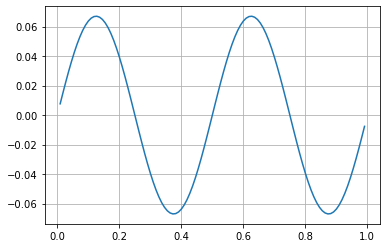

In [30]:
p=1
s=1
n=111
mesh = np.linspace(0,1,n)
newMesh = np.linspace(0,1,2*n-1)

def testFunction(x):
    return np.sin(4*np.pi*x)/4*np.pi*(1+4*np.pi)


F = loadVector1D(mesh, p, testFunction, s)
A = loadMatrix1DLinear(mesh,s)
#A = loadMatrix1DQuadratic(mesh,s)

solution = np.linalg.solve(A[1:-1,1:-1],F[1:-1])

plt.figure()
plt.grid()
plt.plot(mesh[1:-1], solution)
plt.show()

